In [ ]:
import numpy
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
img = cv2.imread('dataset/kanye/original/ye.jpg')
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)


(x,y,w,h) = faces[0]

In [ ]:
def get_cropped_img(path):
    img = cv2.imread(path,3)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces)>0:
        (x,y,w,h) = faces[0]
        return img[y:y+h, x:x+w]

In [ ]:
rappers = 'kanye drake jayz eminem nicki'.split()
for rapper in rappers:
    folder = os.listdir(f'dataset/{rapper}/original')
    if '.DS_Store' in folder:
        os.remove(os.path.join(f'dataset/{rapper}/original','.DS_Store'))
        print(f'removed ds store in {rapper}')

In [ ]:
for rapper in rappers:
    for i, file in enumerate(os.listdir(f'dataset/{rapper}/original')):
        fullpath = os.path.join(f'dataset/{rapper}/original', file)
        cropped_image = get_cropped_img(fullpath)
        if isinstance(cropped_image, numpy.ndarray):
            number = str(i).zfill(2)
            plt.imsave(f'dataset/{rapper}/cropped/{number}.png',cropped_image)
            print(f'saved to dataset/{rapper}/cropped/{number}.png')

In [12]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [17]:
rappers = 'kanye drake jayz eminem nicki'.split()
for rapper in rappers:
    folder = os.listdir(f'dataset/{rapper}/cropped')
    if '.DS_Store' in folder:
        os.remove(os.path.join(f'dataset/{rapper}/cropped','.DS_Store'))
        print(f'removed ds store in {rapper} cropped folder')

removed ds store in kanye cropped folder
removed ds store in drake cropped folder
removed ds store in jayz cropped folder
removed ds store in eminem cropped folder
removed ds store in nicki cropped folder


In [38]:
X = []
y = []

for r, rapper in enumerate(rappers):
    folder = f'dataset/{rapper}/cropped'
    for file in os.listdir(folder):
        fullpath = os.path.join(folder,file)
        print(fullpath)
        img = cv2.imread(fullpath)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        print(f'\t{combined_img.shape}')
        y.append(r)
        

dataset/kanye/cropped/62.png
	(4096, 1)
dataset/kanye/cropped/76.png
	(4096, 1)
dataset/kanye/cropped/89.png
	(4096, 1)
dataset/kanye/cropped/48.png
	(4096, 1)
dataset/kanye/cropped/49.png
	(4096, 1)
dataset/kanye/cropped/61.png
	(4096, 1)
dataset/kanye/cropped/59.png
	(4096, 1)
dataset/kanye/cropped/70.png
	(4096, 1)
dataset/kanye/cropped/64.png
	(4096, 1)
dataset/kanye/cropped/66.png
	(4096, 1)
dataset/kanye/cropped/73.png
	(4096, 1)
dataset/kanye/cropped/98.png
	(4096, 1)
dataset/kanye/cropped/101.png
	(4096, 1)
dataset/kanye/cropped/14.png
	(4096, 1)
dataset/kanye/cropped/00.png
	(4096, 1)
dataset/kanye/cropped/28.png
	(4096, 1)
dataset/kanye/cropped/29.png
	(4096, 1)
dataset/kanye/cropped/03.png
	(4096, 1)
dataset/kanye/cropped/16.png
	(4096, 1)
dataset/kanye/cropped/02.png
	(4096, 1)
dataset/kanye/cropped/06.png
	(4096, 1)
dataset/kanye/cropped/12.png
	(4096, 1)
dataset/kanye/cropped/13.png
	(4096, 1)
dataset/kanye/cropped/04.png
	(4096, 1)
dataset/kanye/cropped/10.png
	(4096, 1)

	(4096, 1)
dataset/eminem/cropped/31.png
	(4096, 1)
dataset/eminem/cropped/42.png
	(4096, 1)
dataset/eminem/cropped/43.png
	(4096, 1)
dataset/eminem/cropped/94.png
	(4096, 1)
dataset/eminem/cropped/82.png
	(4096, 1)
dataset/eminem/cropped/96.png
	(4096, 1)
dataset/eminem/cropped/55.png
	(4096, 1)
dataset/eminem/cropped/68.png
	(4096, 1)
dataset/eminem/cropped/54.png
	(4096, 1)
dataset/eminem/cropped/97.png
	(4096, 1)
dataset/eminem/cropped/93.png
	(4096, 1)
dataset/eminem/cropped/50.png
	(4096, 1)
dataset/eminem/cropped/51.png
	(4096, 1)
dataset/eminem/cropped/45.png
	(4096, 1)
dataset/eminem/cropped/84.png
	(4096, 1)
dataset/eminem/cropped/53.png
	(4096, 1)
dataset/eminem/cropped/85.png
	(4096, 1)
dataset/nicki/cropped/63.png
	(4096, 1)
dataset/nicki/cropped/62.png
	(4096, 1)
dataset/nicki/cropped/60.png
	(4096, 1)
dataset/nicki/cropped/48.png
	(4096, 1)
dataset/nicki/cropped/59.png
	(4096, 1)
dataset/nicki/cropped/58.png
	(4096, 1)
dataset/nicki/cropped/00.png
	(4096, 1)
dataset/nick

In [22]:
#time for the real AI
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X = np.array(X)
shape = X.shape
X = X.reshape(shape[0],shape[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = np.array(X_train)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7464788732394366

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.80      0.80      0.80        15
           2       0.73      0.84      0.78        19
           3       0.72      0.68      0.70        19
           4       0.83      0.71      0.77         7

    accuracy                           0.75        71
   macro avg       0.76      0.74      0.74        71
weighted avg       0.75      0.75      0.75        71



In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.647619,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.833333,{'logisticregression__C': 10}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.7887323943661971

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.6197183098591549

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8169014084507042

In [49]:
best_clf = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  1,  2,  0,  0],
       [ 1, 12,  0,  2,  0],
       [ 0,  0, 14,  3,  2],
       [ 2,  1,  1, 15,  0],
       [ 0,  0,  0,  0,  7]])

Text(69.0, 0.5, 'Truth')

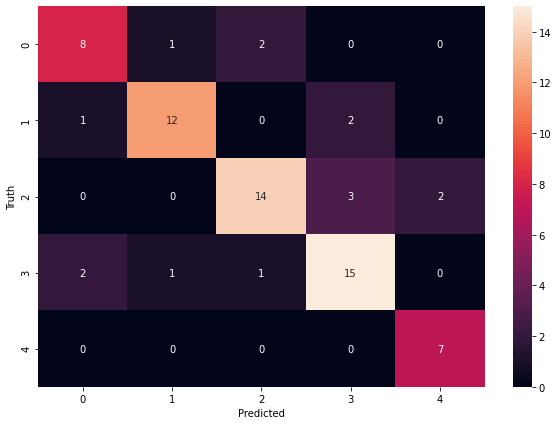

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [52]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [53]:
class_dict = {'kanye': 0,
 'drake': 1,
 'jayz': 2,
 'eminem': 3,
 'nicki': 4}

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))